In [130]:
import sys
sys.path.append('../Codes/Kitas_Schools')
import numpy as np
import matplotlib.pyplot as plt
from io import StringIO
from matplotlib.lines import Line2D
from datetime import datetime, timedelta
import scipy.special as sc
import os.path
import pickle
from matplotlib import style
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit
from IPython.display import display, Math
import matplotlib.ticker as mtick

def my_linear_func(x, a, b):
    return a + b*x
def my_quadratic_func(x, a, b, c):
    return np.log(a)+np.log(np.sqrt(-b)) + b*(x-c)**2

Text_files_path = '../../../../../Dropbox/Research/Epidemiology_2020/Text_files/Kitas_Schools/Statistics/'
print(style.available)
#style.use('seaborn-paper')
%autosave 60

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


Autosaving every 60 seconds


In [170]:
days = ["mon", "tue", "wed", "thu", "fri", "sat", "sun"]
T = 7*4
times = 1

## Statistics of ensemble

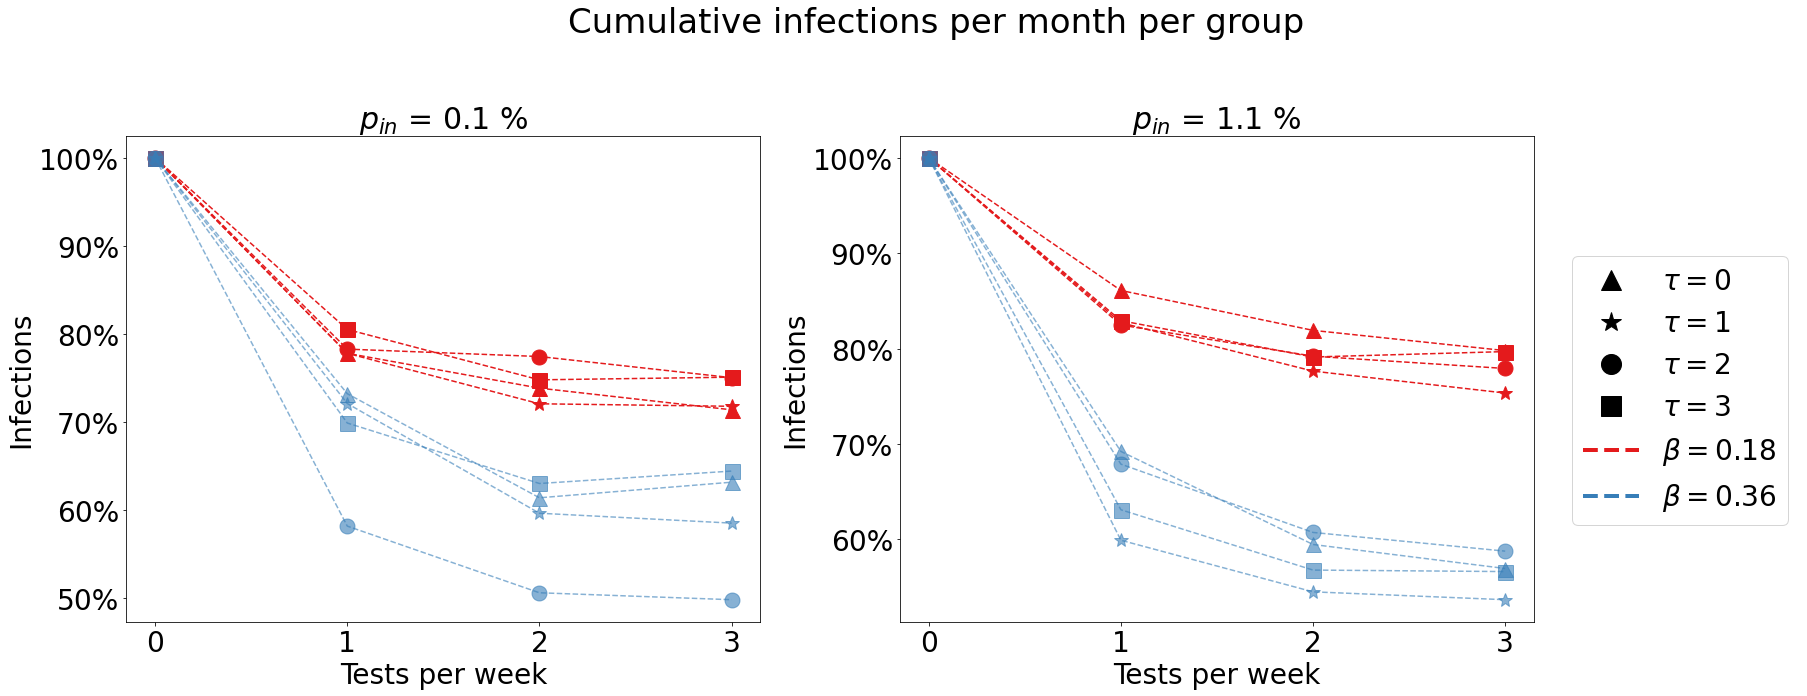

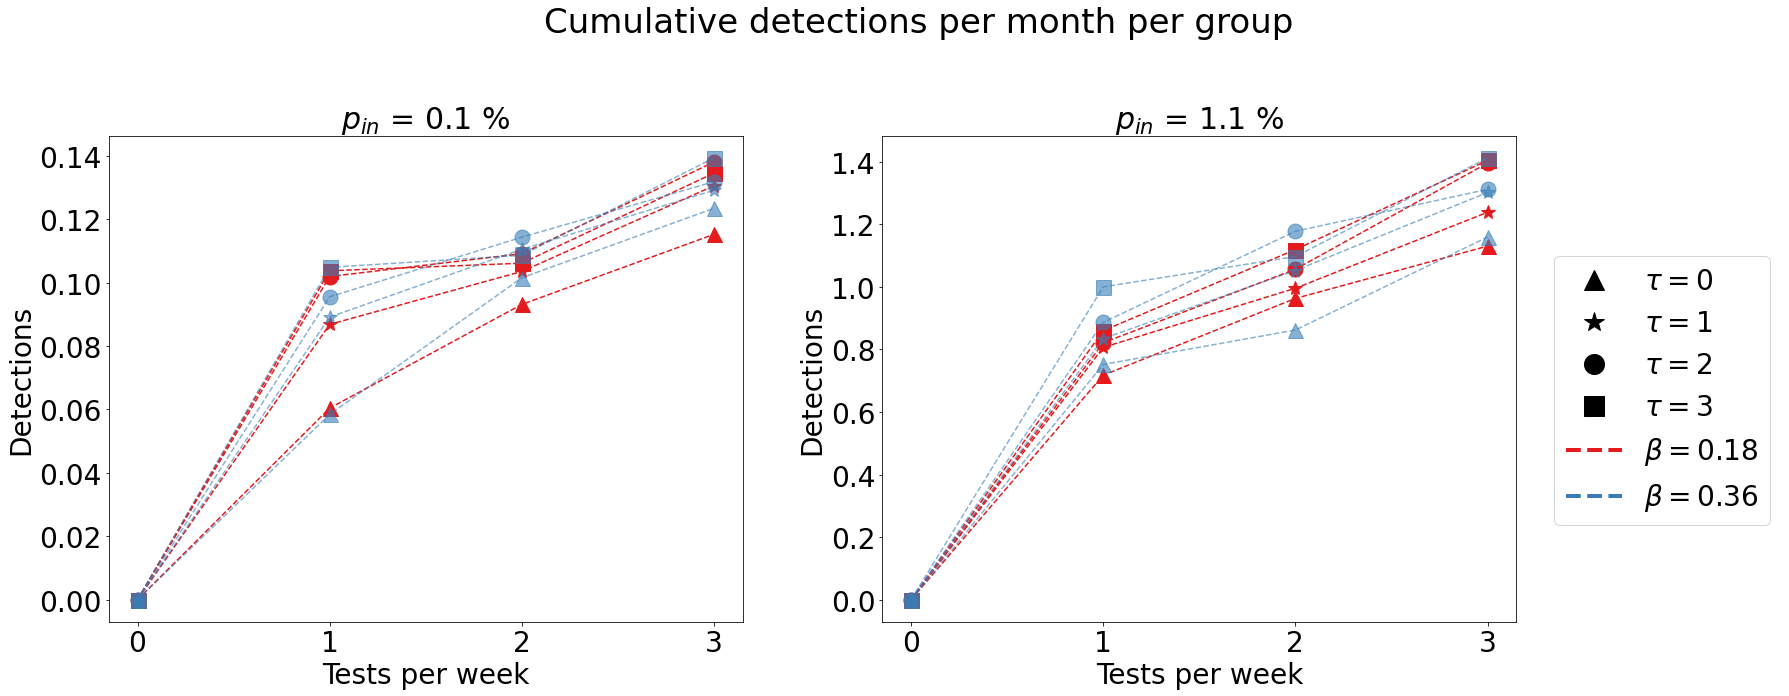

In [171]:
from matplotlib.ticker import PercentFormatter
n_ensemble = 100
n_testing_days=[0, 1, 2, 3]
testing_days=[[0], [2], [1,3], [0,2,4]]
testing_days2=["0", "2", "13", "024"]
betas=[0.18, 0.36]
p_in_s=[0.0011, 0.011]
taus=[0, 1, 2, 3]
alphas = [1, 0.6]

colors = plt.cm.Set1(range(5))
markers = ['^', '*', 'o', 's']

fig, ax = plt.subplots(1,3,figsize = (30,10), gridspec_kw={'width_ratios': [1, 1, 0.2], 'wspace' : .3, 'top':.8})
fig2, ax2 = plt.subplots(1,3,figsize = (30,10), gridspec_kw={'width_ratios': [1, 1, 0.2], 'wspace' : .3, 'top':.8})
z = 1
for k, beta in enumerate(betas):
    for j, tau in enumerate(taus):
        for l, p_in in enumerate(p_in_s):
            means_inf = np.array([])
            means_det = np.array([])
            for i, n_testing_day in enumerate(n_testing_days):
                data = np.loadtxt(Text_files_path+'statistics_days-%d-'%(n_testing_day)+testing_days2[i]+'_beta-%.6f_pin-%.6f_tau-%d_%d.txt'%(beta, p_in, tau, times))
                means_inf = np.append(means_inf, ((np.mean(data[:,0])))/(1))
                means_det = np.append(means_det, ((np.mean(data[:,1])))/(1))
                if(n_testing_day==0):
                    z = np.mean(data[:,0])
            ax[l].set_title(r'$p_{in}$ = %.1f %%'%(p_in*100), fontsize = 30)
            ax[l].plot([0,1,2,3],means_inf/z, marker = markers[j], linestyle = '--', color = colors[k], ms = 15, alpha = alphas[k])
            ax[l].tick_params(labelsize = 28)
            ax[l].set_xticks([0,1,2,3])
            ax[l].yaxis.set_major_formatter(PercentFormatter(1))
            ax[l].set_xlabel('Tests per week', fontsize = 28)
            ax[l].set_ylabel('Infections', fontsize = 28)
            
            ax2[l].set_title(r'$p_{in}$ = %.1f %%'%(p_in*100), fontsize = 30)
            ax2[l].plot([0,1,2,3],means_det, marker = markers[j], linestyle = '--', color = colors[k], ms = 15, alpha = alphas[k])
            ax2[l].tick_params(labelsize = 28)
            ax2[l].set_xticks([0,1,2,3])
            #ax2[l].yaxis.set_major_formatter(PercentFormatter(1))
            ax2[l].set_xlabel('Tests per week', fontsize = 28)
            ax2[l].set_ylabel('Detections', fontsize = 28)
            
custom_lines = [Line2D([0], [0],linestyle = '', marker = '^', ms = 20, color='k', lw=4),
                Line2D([0], [0],linestyle = '', marker = '*', ms = 20, color='k', lw=4),
                Line2D([0], [0],linestyle = '', marker = 'o', ms = 20, color='k', lw=4),
                Line2D([0], [0],linestyle = '', marker = 's', ms = 20, color='k', lw=4)]
labels = [r'$\tau = 0$', r'$\tau = 1$', r'$\tau = 2$', r'$\tau = 3$']
custom_lines2 = [Line2D([0], [0],linestyle = '--', color=i, lw=4) for i in colors]
labels2 = [r'$\beta = %.2f$'%(i) for i in betas]

ax[2].axis('off')
ax[2].legend(np.concatenate((custom_lines, custom_lines2)), np.concatenate((labels, labels2)), fontsize = 28, loc = (-.8,0.2))
#ax[2].legend(custom_lines2, labels2, fontsize =30, loc = (-.8,0.2))

fig.suptitle('Cumulative infections per month per group', fontsize = 34);
#fig.savefig('../../Figures/Kitas_Schools/statistics_infections.pdf')
fig.savefig('../../Figures/Kitas_Schools/statistics_infections_percent_%d.png'%(times))

ax2[2].axis('off')
ax2[2].legend(np.concatenate((custom_lines, custom_lines2)), np.concatenate((labels, labels2)), fontsize = 28, loc = (-.8,0.2))
#ax2[2].legend(custom_lines2, labels2, fontsize =30, loc = (-.8,0.2))

fig2.suptitle('Cumulative detections per month per group', fontsize = 34);
#fig2.savefig('../../Figures/Kitas_Schools/statistics_detections.pdf')
fig2.savefig('../../Figures/Kitas_Schools/statistics_detections_%d.png'%(times))


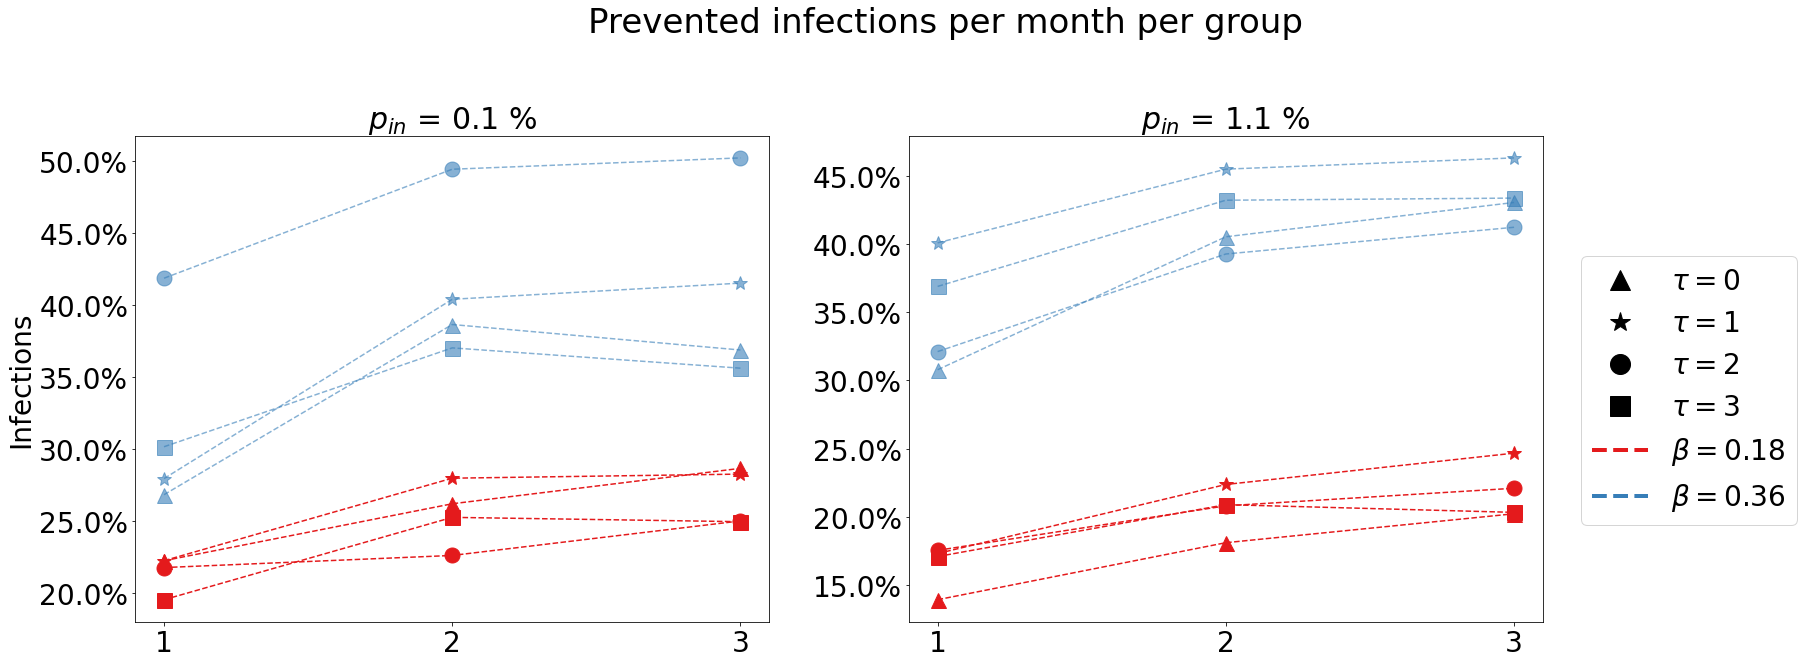

In [172]:
from matplotlib.ticker import PercentFormatter
n_ensemble = 100
n_testing_days=[1, 2, 3]
testing_days=[[2], [1,3], [0,2,4]]
testing_days2=["2", "13", "024"]
betas=[0.18, 0.36]
p_in_s=[0.0011, 0.011]
taus=[0, 1, 2, 3]
alphas = [1, 0.6]

colors = plt.cm.Set1(range(5))
markers = ['^', '*', 'o', 's']

fig, ax = plt.subplots(1,3,figsize = (30,10), gridspec_kw={'width_ratios': [1, 1, 0.2], 'wspace' : .3, 'top':0.8})
for k, beta in enumerate(betas):
    for j, tau in enumerate(taus):
        for l, p_in in enumerate(p_in_s):
            means = np.array([])
            for i, n_testing_day in enumerate(n_testing_days):
                data0 = np.loadtxt(Text_files_path+'statistics_days-%d-'%(0)+'0'+'_beta-%.6f_pin-%.6f_tau-%d_%d.txt'%(beta, p_in, tau, times))
                data = np.loadtxt(Text_files_path+'statistics_days-%d-'%(n_testing_day)+testing_days2[i]+'_beta-%.6f_pin-%.6f_tau-%d_%d.txt'%(beta, p_in, tau, times))
                means = np.append(means, ((np.mean(data0[:,0])) - (np.mean(data[:,0])))/(np.mean(data0[:,0])))
            ax[l].set_title(r'$p_{in}$ = %.1f %%'%(p_in*100), fontsize = 30)
            ax[l].plot([1,2,3],means, marker = markers[j], linestyle = '--', color = colors[k], ms = 15, alpha = alphas[k])
            ax[l].tick_params(labelsize = 28)
            ax[l].set_xticks([1,2,3])
            ax[l].yaxis.set_major_formatter(PercentFormatter(1))
            
            if(int(l/2)==1):
                ax[l].set_xlabel('Tests per week', fontsize = 28)
            if(l%2==0):
                ax[l].set_ylabel('Infections', fontsize = 28)
            
custom_lines = [Line2D([0], [0],linestyle = '', marker = '^', ms = 20, color='k', lw=4),
                Line2D([0], [0],linestyle = '', marker = '*', ms = 20, color='k', lw=4),
                Line2D([0], [0],linestyle = '', marker = 'o', ms = 20, color='k', lw=4),
               Line2D([0], [0],linestyle = '', marker = 's', ms = 20, color='k', lw=4)]
labels = [r'$\tau = 0$', r'$\tau = 1$', r'$\tau = 2$', r'$\tau = 3$']
custom_lines2 = [Line2D([0], [0],linestyle = '--', color=i, lw=4) for i in colors]
labels2 = [r'$\beta = %.2f$'%(i) for i in betas]
ax[2].axis('off')
ax[2].legend(np.concatenate((custom_lines, custom_lines2)), np.concatenate((labels, labels2)), fontsize = 28, loc = (-.8,0.2))


fig.suptitle('Prevented infections per month per group', fontsize = 34)
#fig.savefig('../../Figures/Kitas_Schools/statistics_prevented_infections.pdf')
fig.savefig('../../Figures/Kitas_Schools/statistics_prevented_infections_percent_%d.png'%(times))

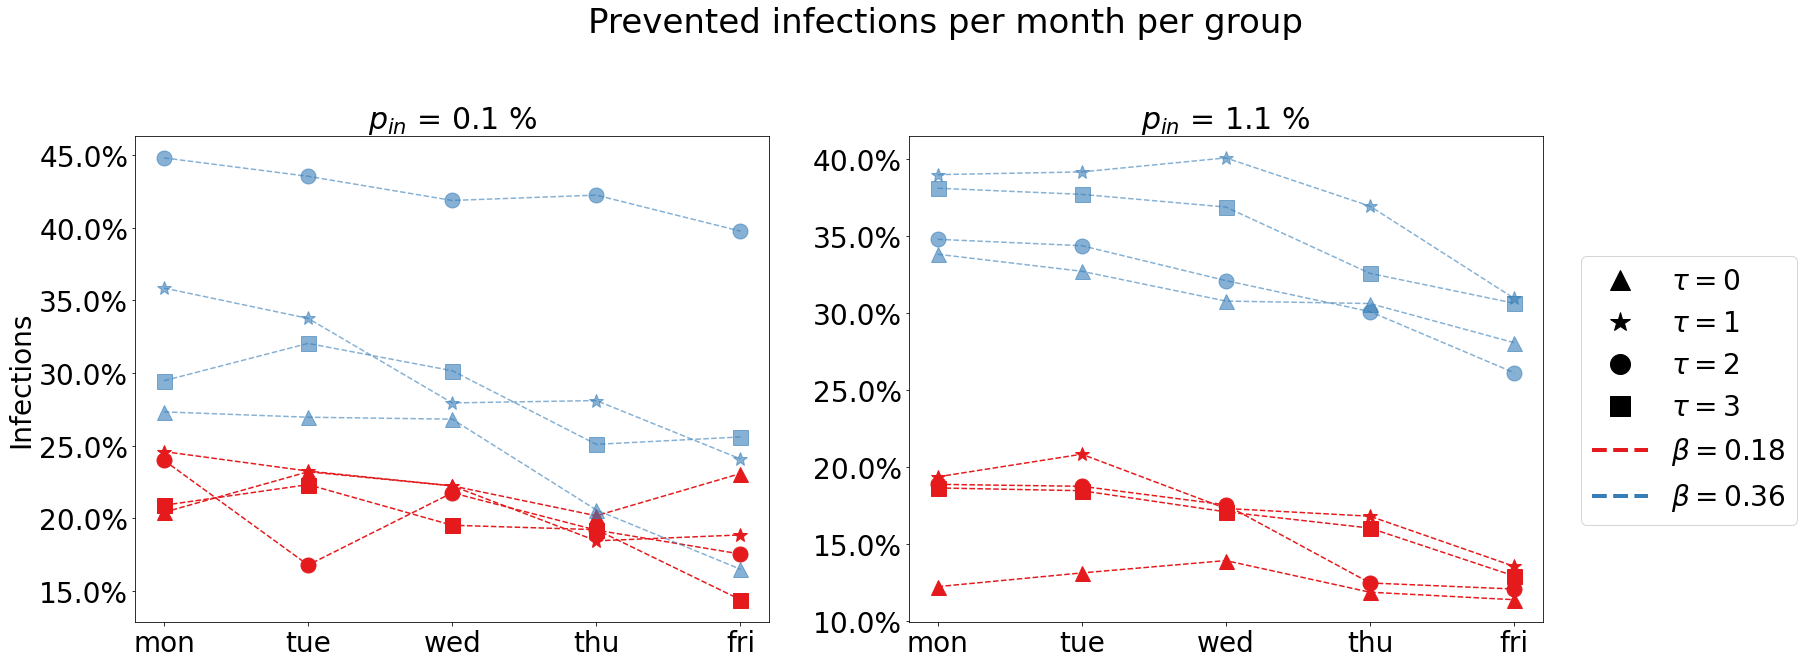

In [173]:
from matplotlib.ticker import PercentFormatter
n_ensemble = 100
n_testing_days=[1]
testing_days=[0, 1, 2, 3, 4]
testing_days2=["0", "1", "2", "3", "4"]
betas=[0.18, 0.36]
p_in_s=[0.0011, 0.011]
taus=[0, 1, 2, 3]
alphas = [1, 0.6]

colors = plt.cm.Set1(range(5))
markers = ['^', '*', 'o', 's']

fig, ax = plt.subplots(1,3,figsize = (30,10), gridspec_kw={'width_ratios': [1, 1, 0.2], 'wspace' : .3, 'top':0.8})
for k, beta in enumerate(betas):
    for j, tau in enumerate(taus):
        for l, p_in in enumerate(p_in_s):
            means = np.array([])
            for i, testing_day in enumerate(testing_days):
                data0 = np.loadtxt(Text_files_path+'statistics_days-%d-'%(0)+'0'+'_beta-%.6f_pin-%.6f_tau-%d_%d.txt'%(beta, p_in, tau, times))
                data = np.loadtxt(Text_files_path+'statistics_days-%d-'%(1)+testing_days2[i]+'_beta-%.6f_pin-%.6f_tau-%d_%d.txt'%(beta, p_in, tau, times))
                means = np.append(means, ((np.mean(data0[:,0])) - (np.mean(data[:,0])))/(np.mean(data0[:,0])))
            ax[l].set_title(r'$p_{in}$ = %.1f %%'%(p_in*100), fontsize = 30)
            ax[l].plot([0,1,2,3,4],means, marker = markers[j], linestyle = '--', color = colors[k], ms = 15, alpha = alphas[k])
            ax[l].tick_params(labelsize = 28)
            ax[l].set_xticks([0, 1, 2, 3, 4])
            ax[l].set_xticklabels(['mon', 'tue', 'wed', 'thu', 'fri'])
            ax[l].yaxis.set_major_formatter(PercentFormatter(1))
            
            if(int(l/2)==1):
                ax[l].set_xlabel('Day', fontsize = 28)
            if(l%2==0):
                ax[l].set_ylabel('Infections', fontsize = 28)
            
custom_lines = [Line2D([0], [0],linestyle = '', marker = '^', ms = 20, color='k', lw=4),
                Line2D([0], [0],linestyle = '', marker = '*', ms = 20, color='k', lw=4),
                Line2D([0], [0],linestyle = '', marker = 'o', ms = 20, color='k', lw=4),
               Line2D([0], [0],linestyle = '', marker = 's', ms = 20, color='k', lw=4)]
labels = [r'$\tau = 0$', r'$\tau = 1$', r'$\tau = 2$', r'$\tau = 3$']
custom_lines2 = [Line2D([0], [0],linestyle = '--', color=i, lw=4) for i in colors]
labels2 = [r'$\beta = %.2f$'%(i) for i in betas]
ax[2].axis('off')
ax[2].legend(custom_lines, labels, fontsize = 28, loc = (-.8,0.4))
ax[2].legend(custom_lines2, labels2, fontsize =30, loc = (-.8,0.2))
ax[2].legend(np.concatenate((custom_lines, custom_lines2)), np.concatenate((labels, labels2)), fontsize = 28, loc = (-.8,0.2))


fig.suptitle('Prevented infections per month per group', fontsize = 34)
#fig.savefig('../../Figures/Kitas_Schools/statistics_prevented_infections_one_day.pdf')
fig.savefig('../../Figures/Kitas_Schools/statistics_prevented_infections_one_day_percent_%d.png'%(times))



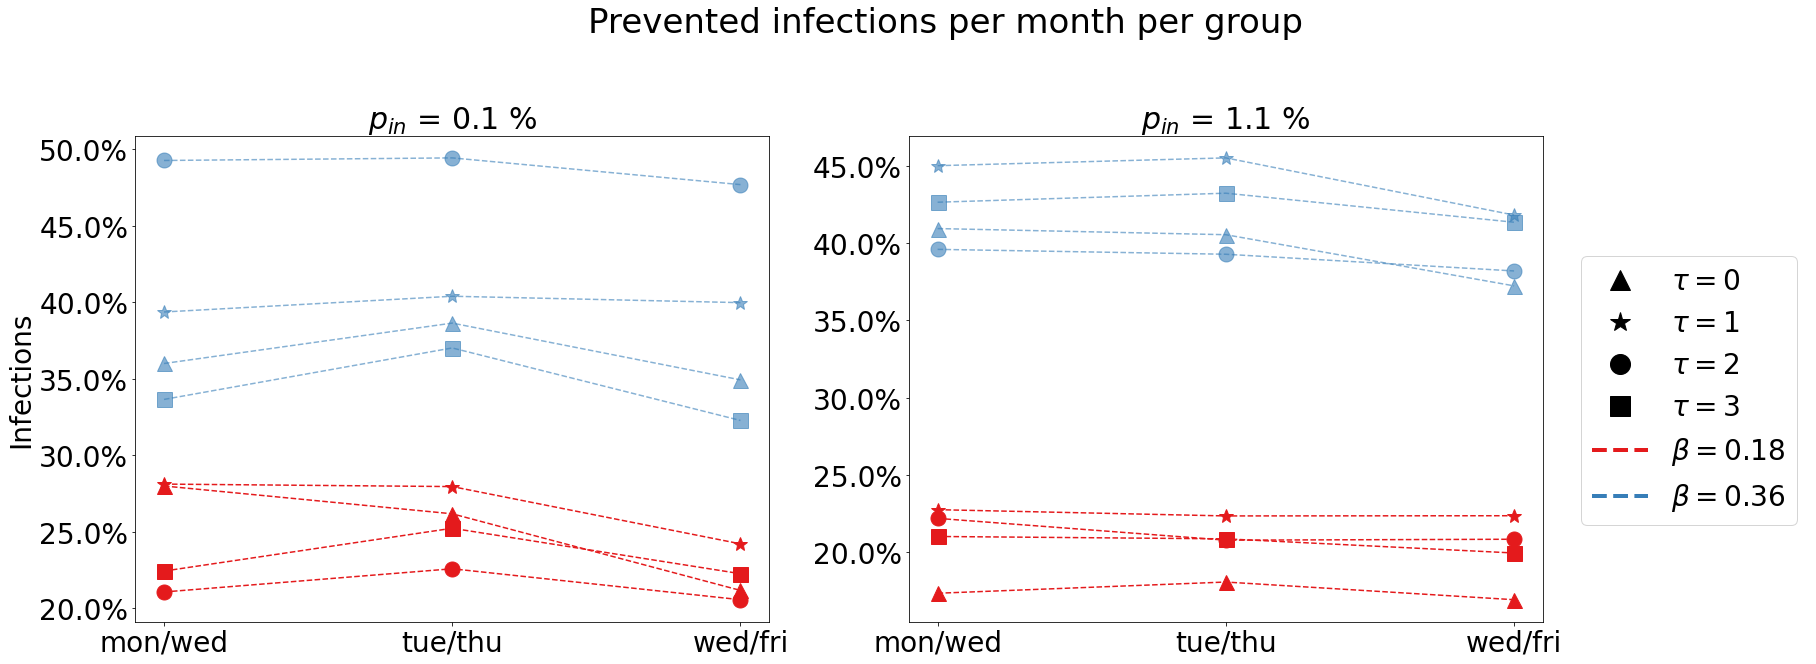

In [174]:
from matplotlib.ticker import PercentFormatter
n_ensemble = 100
n_testing_days=[2]
testing_days=[2, 13, 24]
testing_days2=["02", "13", "24"]
betas=[0.18, 0.36]
p_in_s=[0.0011, 0.011]
taus=[0, 1, 2, 3]
alphas = [1, 0.6]

colors = plt.cm.Set1(range(5))
markers = ['^', '*', 'o', 's']

fig, ax = plt.subplots(1,3,figsize = (30,10), gridspec_kw={'width_ratios': [1, 1, 0.2], 'wspace' : .3, 'top':0.8})
for k, beta in enumerate(betas):
    for j, tau in enumerate(taus):
        for l, p_in in enumerate(p_in_s):
            means = np.array([])
            for i, testing_day in enumerate(testing_days):
                data0 = np.loadtxt(Text_files_path+'statistics_days-%d-'%(0)+'0'+'_beta-%.6f_pin-%.6f_tau-%d_%d.txt'%(beta, p_in, tau, times))
                data = np.loadtxt(Text_files_path+'statistics_days-%d-'%(2)+testing_days2[i]+'_beta-%.6f_pin-%.6f_tau-%d_%d.txt'%(beta, p_in, tau, times))
                means = np.append(means, ((np.mean(data0[:,0])) - (np.mean(data[:,0])))/(np.mean(data0[:,0])))
            ax[l].set_title(r'$p_{in}$ = %.1f %%'%(p_in*100), fontsize = 30)
            ax[l].plot([0,1,2],means, marker = markers[j], linestyle = '--', color = colors[k], ms = 15, alpha = alphas[k])
            ax[l].tick_params(labelsize = 28)
            ax[l].set_xticks([0, 1, 2])
            ax[l].set_xticklabels(['mon/wed', 'tue/thu', 'wed/fri'])
            ax[l].yaxis.set_major_formatter(PercentFormatter(1))
            
            if(int(l/2)==1):
                ax[l].set_xlabel('Days', fontsize = 28)
            if(l%2==0):
                ax[l].set_ylabel('Infections', fontsize = 28)
            
custom_lines = [Line2D([0], [0],linestyle = '', marker = '^', ms = 20, color='k', lw=4),
                Line2D([0], [0],linestyle = '', marker = '*', ms = 20, color='k', lw=4),
                Line2D([0], [0],linestyle = '', marker = 'o', ms = 20, color='k', lw=4),
                Line2D([0], [0],linestyle = '', marker = 's', ms = 20, color='k', lw=4)]

labels = [r'$\tau = 0$', r'$\tau = 1$', r'$\tau = 2$', r'$\tau = 3$']

custom_lines2 = [Line2D([0], [0],linestyle = '--', color=i, lw=4) for i in colors]
labels2 = [r'$\beta = %.2f$'%(i) for i in betas]
ax[2].axis('off')
ax[2].legend(custom_lines, labels, fontsize = 28, loc = (-.8,0.4))
ax[2].legend(custom_lines2, labels2, fontsize =30, loc = (-.8,0.2))
ax[2].legend(np.concatenate((custom_lines, custom_lines2)), np.concatenate((labels, labels2)), fontsize = 28, loc = (-.8,0.2))


fig.suptitle('Prevented infections per month per group', fontsize = 34)
#fig.savefig('../../Figures/Kitas_Schools/statistics_prevented_infections_two_days.pdf')
fig.savefig('../../Figures/Kitas_Schools/statistics_prevented_infections_two_days_percent_%d.png'%(times))



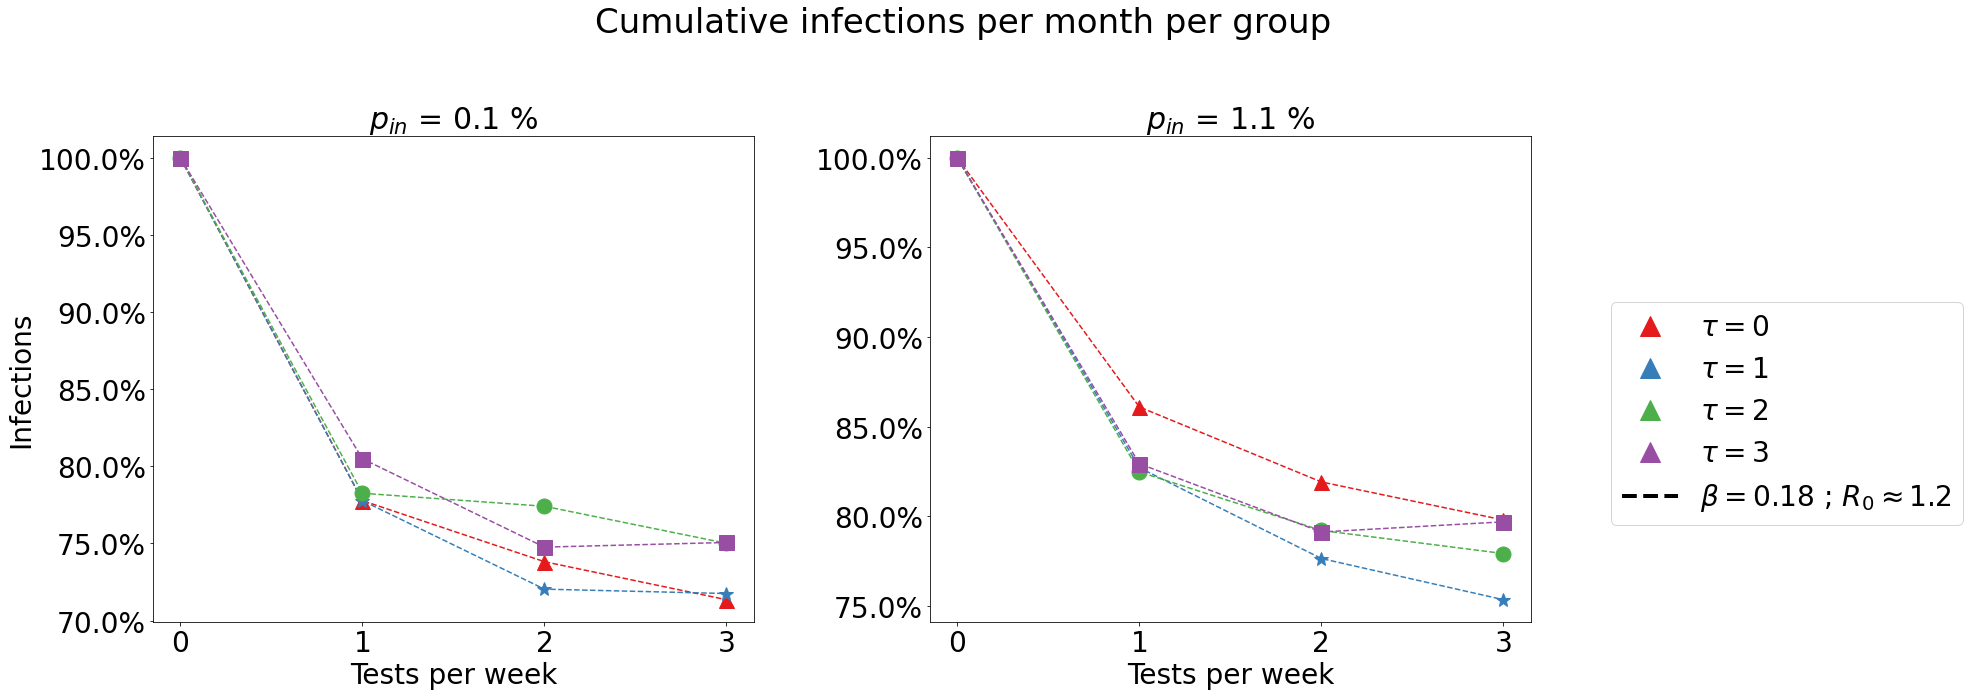

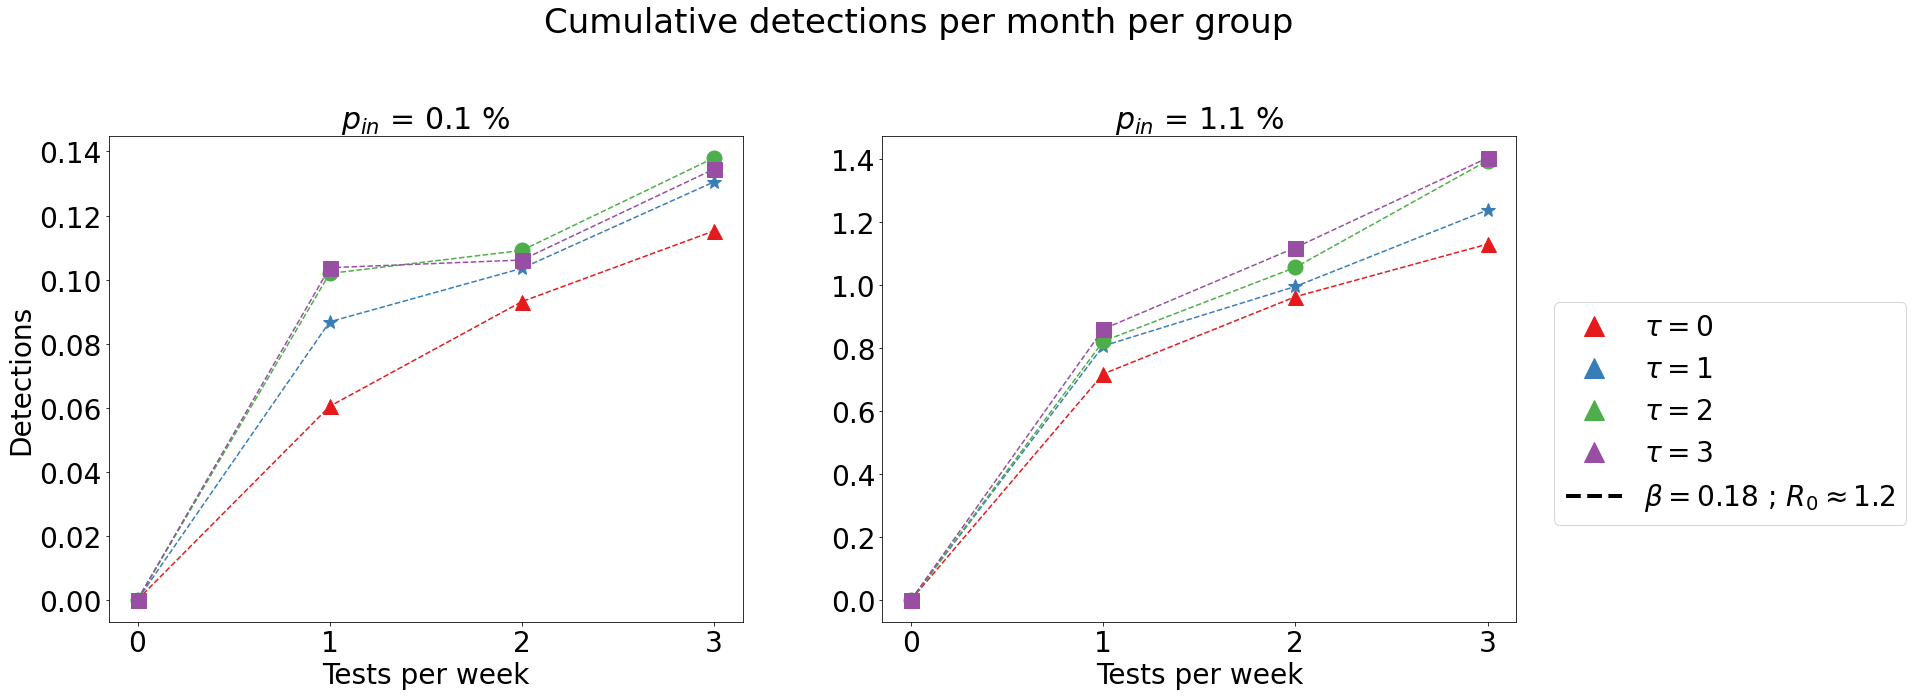

In [175]:
from matplotlib.ticker import PercentFormatter
n_ensemble = 100
n_testing_days=[0, 1, 2, 3]
testing_days=[[0], [2], [1,3], [0,2,4]]
testing_days2=["0", "2", "13", "024"]
betas=[0.18]
p_in_s=[0.0011, 0.011]
taus=[0,1, 2, 3]

colors = plt.cm.Set1(range(4))
markers = ['^', '*', 'o', 's']
z = 1
fig, ax = plt.subplots(1,3,figsize = (30,10), gridspec_kw={'width_ratios': [1, 1, 0.2], 'wspace' : .4, 'top':0.8})
fig2, ax2 = plt.subplots(1,3,figsize = (30,10), gridspec_kw={'width_ratios': [1, 1, 0.2], 'wspace' : .3, 'top':0.8})
z = 1
for k, beta in enumerate(betas):
    for j, tau in enumerate(taus):
        for l, p_in in enumerate(p_in_s):
            means_inf = np.array([])
            means_det = np.array([])
            for i, n_testing_day in enumerate(n_testing_days):
                data = np.loadtxt(Text_files_path+'statistics_days-%d-'%(n_testing_day)+testing_days2[i]+'_beta-%.6f_pin-%.6f_tau-%d_%d.txt'%(beta, p_in, tau, times))
                means_inf = np.append(means_inf, ((np.mean(data[:,0])))/(1))
                means_det = np.append(means_det, ((np.mean(data[:,1])))/(1))
                if(n_testing_day==0):
                    z = np.mean(data[:,0])
                    
            ax[l].set_title(r'$p_{in}$ = %.1f %%'%(p_in*100), fontsize = 30)
            ax[l].plot([0,1,2,3], means_inf/z, marker = markers[j], linestyle = '--', color = colors[j], ms = 15)
            ax[l].tick_params(labelsize = 28)
            ax[l].set_xticks([0,1,2,3])
            ax[l].yaxis.set_major_formatter(PercentFormatter(1))
            ax[l].set_xlabel('Tests per week', fontsize = 28)
            if(l%2==0):
                ax[l].set_ylabel('Infections', fontsize = 28)
            
            ax2[l].set_title(r'$p_{in}$ = %.1f %%'%(p_in*100), fontsize = 30)
            ax2[l].plot([0,1,2,3],means_det, marker = markers[j], linestyle = '--', color = colors[j], ms = 15)
            ax2[l].tick_params(labelsize = 28)
            ax2[l].set_xticks([0,1,2,3])
            #ax2[int(l/2),l%2].yaxis.set_major_formatter(PercentFormatter(1))
            ax2[l].set_xlabel('Tests per week', fontsize = 28)
            if(l%2==0):
                ax2[l].set_ylabel('Detections', fontsize = 28)
            
custom_lines = [Line2D([0], [0],linestyle = '', marker = '^', ms = 20, color= i, lw=4) for i in colors]
labels = [r'$\tau = 0$', r'$\tau = 1$', r'$\tau = 2$', r'$\tau = 3$']
custom_lines2 = [Line2D([0], [0],linestyle = '--', color='k', lw=4)]
labels2 = [r'$\beta = %.2f$ ; $R_0 \approx 1.2$'%(i) for i in betas]
ax[2].axis('off')
ax[2].legend(custom_lines, labels, fontsize = 28, loc = (-.8,0.4))
ax[2].legend(custom_lines2, labels2, fontsize =30, loc = (-.8,0.2))
ax[2].legend(np.concatenate((custom_lines, custom_lines2)), np.concatenate((labels, labels2)), fontsize = 28, loc = (-.8,0.2))

fig.suptitle('Cumulative infections per month per group', fontsize = 34)
#fig.savefig('../../Figures/Kitas_Schools/statistics_infections_beta-%.2f.pdf'%(beta))
fig.savefig('../../Figures/Kitas_Schools/statistics_infections_beta-%.2f_percent_%d.png'%(beta, times))

ax2[2].axis('off')
ax2[2].legend(custom_lines, labels, fontsize = 28, loc = (-.8,0.4))
ax2[2].legend(custom_lines2, labels2, fontsize =30, loc = (-.8,0.2))
ax2[2].legend(np.concatenate((custom_lines, custom_lines2)), np.concatenate((labels, labels2)), fontsize = 28, loc = (-.8,0.2))

fig2.suptitle('Cumulative detections per month per group', fontsize = 34)
#fig2.savefig('../../Figures/Kitas_Schools/statistics_infections_beta-%.2f.pdf'%(beta))
fig2.savefig('../../Figures/Kitas_Schools/statistics_infections_beta-%.2f_%d.png'%(beta, times))




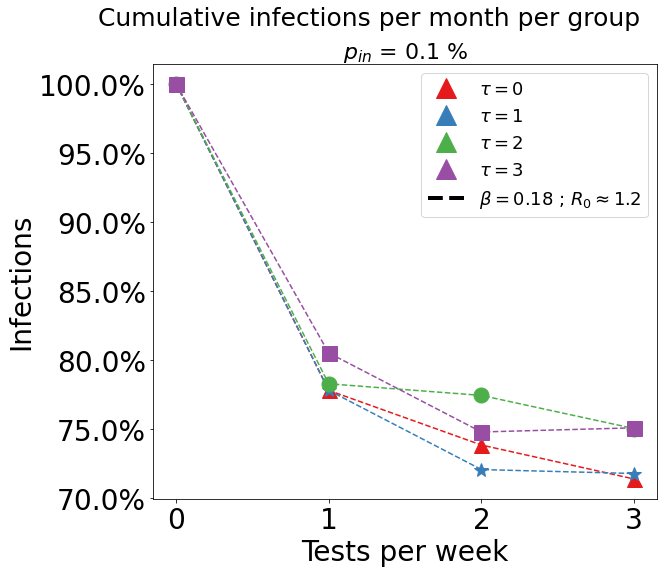

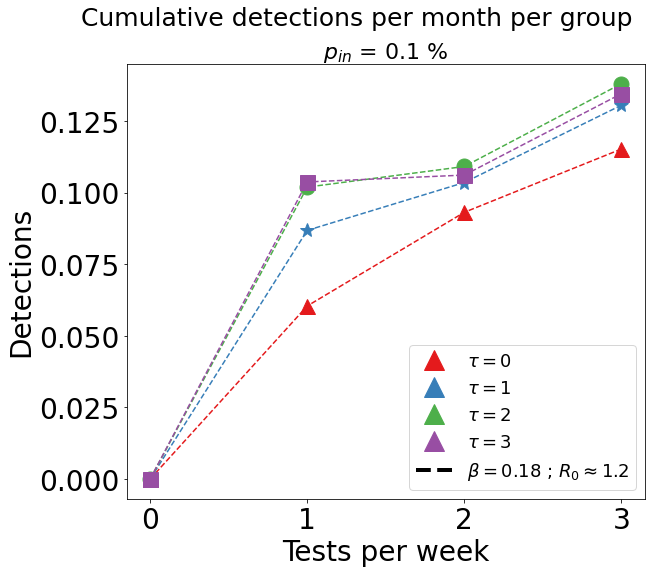

In [176]:
from matplotlib.ticker import PercentFormatter
n_ensemble = 100
n_testing_days=[0, 1, 2, 3]
testing_days=[[0], [2], [1,3], [0,2,4]]
testing_days2=["0", "2", "13", "024"]
betas=[0.18]
p_in_s=[0.0011]
taus=[0, 1, 2, 3]

colors = plt.cm.Set1(range(4))
markers = ['^', '*', 'o', 's']
z = 1
fig, ax = plt.subplots(1,1,figsize = (10,8), gridspec_kw={'left':0.2})
fig2, ax2 = plt.subplots(1,1,figsize = (10,8), gridspec_kw={'left':0.18})
for k, beta in enumerate(betas):
    for j, tau in enumerate(taus):
        for l, p_in in enumerate(p_in_s):
            means_inf = np.array([])
            means_det = np.array([])
            stds = np.array([])
            for i, n_testing_day in enumerate(n_testing_days):
                data = np.loadtxt(Text_files_path+'statistics_days-%d-'%(n_testing_day)+testing_days2[i]+'_beta-%.6f_pin-%.6f_tau-%d_%d.txt'%(beta, p_in, tau, times))
                means_inf = np.append(means_inf, ((np.mean(data[:,0])))/(1))
                means_det = np.append(means_det, ((np.mean(data[:,1])))/(1))
                if(n_testing_day==0):
                    z = np.mean(data[:,0])
                #stds = np.append(stds, np.sqrt(np.var(data[:,0])))
            ax.set_title(r'$p_{in}$ = %.1f %%'%(p_in*100), fontsize = 22)
            ax.plot([0,1,2,3],means_inf/z, marker = markers[j], linestyle = '--', color = colors[j], ms = 15)
            #ax.errorbar(x=[0,1,2,3],y=means, yerr=stds/2 , color = colors[j], capsize = 10)
            ax.tick_params(labelsize = 28)
            ax.set_xticks([0,1,2,3])
            ax.yaxis.set_major_formatter(PercentFormatter(1))
            ax.set_xlabel('Tests per week', fontsize = 28)
            ax.set_ylabel('Infections', fontsize = 28)
            
            ax2.set_title(r'$p_{in}$ = %.1f %%'%(p_in*100), fontsize = 22)
            ax2.plot([0,1,2,3],means_det, marker = markers[j], linestyle = '--', color = colors[j], ms = 15)
            #ax2.errorbar(x=[0,1,2,3],y=means, yerr=stds/2 , color = colors[j], capsize = 10)
            ax2.tick_params(labelsize = 28)
            ax2.set_xticks([0,1,2,3])
            ax2.set_xlabel('Tests per week', fontsize = 28)
            ax2.set_ylabel('Detections', fontsize = 28)
            
custom_lines = [Line2D([0], [0],linestyle = '', marker = '^', ms = 20, color= i, lw=4) for i in colors]
labels = [r'$\tau = 0$', r'$\tau = 1$', r'$\tau = 2$', r'$\tau = 3$']
#custom_lines2 = [Line2D([0], [0],linestyle = '--', color='k', lw=4)]
#labels2 = [r'$\beta = %.1f$ ; $R_0 \approx 1.2$'%(i) for i in betas]
#ax.axis('off')
#ax.axis('off')
ax.legend(custom_lines, labels, fontsize = 22, loc = 0)
#ax.legend(custom_lines2, labels2, fontsize =30, loc = (-.8,0.5))
ax.legend(np.concatenate((custom_lines, custom_lines2)), np.concatenate((labels, labels2)), fontsize = 18, loc = 0)
ax2.legend(np.concatenate((custom_lines, custom_lines2)), np.concatenate((labels, labels2)), fontsize = 18, loc = 0)

fig.suptitle('Cumulative infections per month per group', fontsize = 25)
#fig.savefig('../../Figures/Kitas_Schools/statistics_infections_beta-%.2f_estimate.pdf'%(beta))
fig.savefig('../../Figures/Kitas_Schools/statistics_infections_beta-%.2f_estimate_percent_%d.png'%(beta, times))

fig2.suptitle('Cumulative detections per month per group', fontsize = 25)
#fig2.savefig('../../Figures/Kitas_Schools/statistics_detections_beta-%.2f_estimate.pdf'%(beta))
fig2.savefig('../../Figures/Kitas_Schools/statistics_detections_beta-%.2f_estimate_%d.png'%(beta, times))


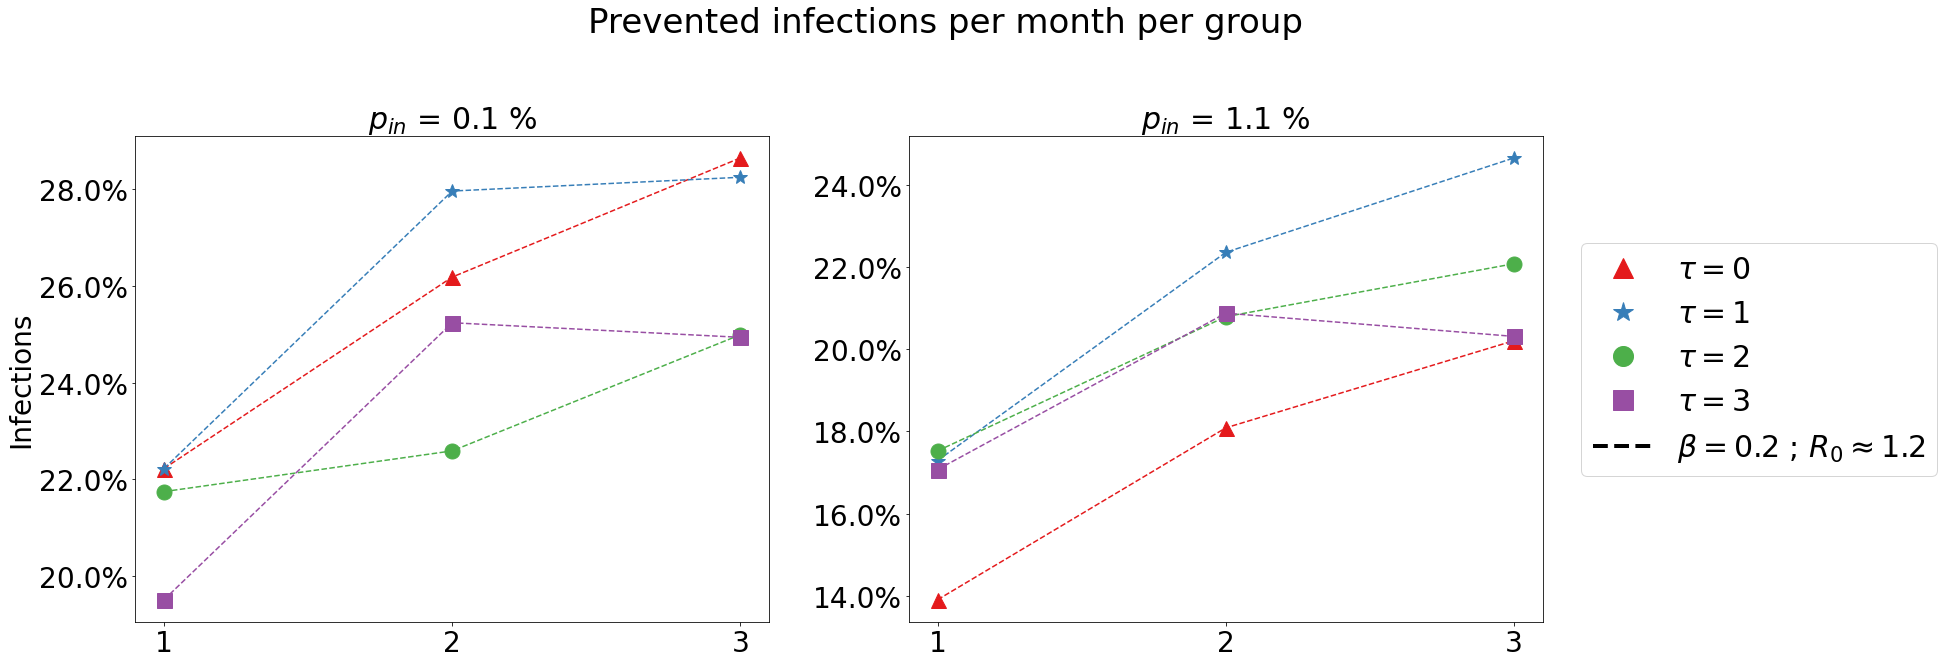

In [177]:
from matplotlib.ticker import PercentFormatter
n_ensemble = 100
n_testing_days=[1, 2, 3]
testing_days=[[2], [1,3], [0,2,4]]
testing_days2=["2", "13", "024"]
betas=[0.18]
p_in_s=[0.0011, 0.011]
taus=[0, 1, 2, 3]

colors = plt.cm.Set1(range(5))
markers = ['^', '*', 'o', 's']

fig, ax = plt.subplots(1,3,figsize = (30,10), gridspec_kw={'width_ratios': [1, 1, 0.2], 'wspace' : .3, 'top':0.8})
for k, beta in enumerate(betas):
    for j, tau in enumerate(taus):
        for l, p_in in enumerate(p_in_s):
            means = np.array([])
            stds0 = np.array([])
            stds = np.array([])
            for i, n_testing_day in enumerate(n_testing_days):
                data0 = np.loadtxt(Text_files_path+'statistics_days-%d-'%(0)+'0'+'_beta-%.6f_pin-%.6f_tau-%d_%d.txt'%(beta, p_in, tau, times))
                data = np.loadtxt(Text_files_path+'statistics_days-%d-'%(n_testing_day)+testing_days2[i]+'_beta-%.6f_pin-%.6f_tau-%d_%d.txt'%(beta, p_in, tau, times))
                means = np.append(means, ((np.mean(data0[:,0])) - (np.mean(data[:,0])))/(np.mean(data0[:,0])))
                stds0 = np.append(stds0, np.sqrt(np.var(data0[:,0])))
                stds = np.append(stds, np.sqrt(np.var(data[:,0])))
            ax[l].set_title(r'$p_{in}$ = %.1f %%'%(p_in*100), fontsize = 30)
            ax[l].plot([1,2,3],means, marker = markers[j], linestyle = '--', color = colors[j], ms = 15)
            #ax[l].errorbar(x=[1,2,3],y=means, yerr=np.sqrt(stds**2 + stds0**2)/2 , color = colors[j], capsize = 10)
            ax[l].tick_params(labelsize = 28)
            ax[l].set_xticks([1,2,3])
            ax[l].yaxis.set_major_formatter(PercentFormatter(1))
            
            if(int(l/2)==1):
                ax[l].set_xlabel('Tests per week', fontsize = 28)
            if(l%2==0):
                ax[l].set_ylabel('Infections', fontsize = 28)
            #ax[l].set_ylim(bottom=0)
            
custom_lines = [Line2D([0], [0],linestyle = '', marker = markers[j], ms = 20, color=colors[j], lw=4) for j in range(len(markers))]
labels = [r'$\tau = 0$', r'$\tau = 1$', r'$\tau = 2$', r'$\tau = 3$']
custom_lines2 = [Line2D([0], [0],linestyle = '--', color='k', lw=4)]
labels2 = [r'$\beta = %.1f$ ; $R_0 \approx 1.2$'%(i) for i in betas]
ax[2].axis('off')
ax[2].axis('off')
ax[2].legend(custom_lines, labels, fontsize = 28, loc = (-.8,0.4))
ax[2].legend(np.concatenate((custom_lines, custom_lines2)), np.concatenate((labels, labels2)), fontsize =30, loc = (-.8,0.3))

fig.suptitle('Prevented infections per month per group', fontsize = 34)
#fig.savefig('../../Figures/Kitas_Schools/statistics_prevented_infections_beta-%.2f.pdf'%(beta))
fig.savefig('../../Figures/Kitas_Schools/statistics_prevented_infections_beta-%.2f_percent_%d.png'%(beta, times))



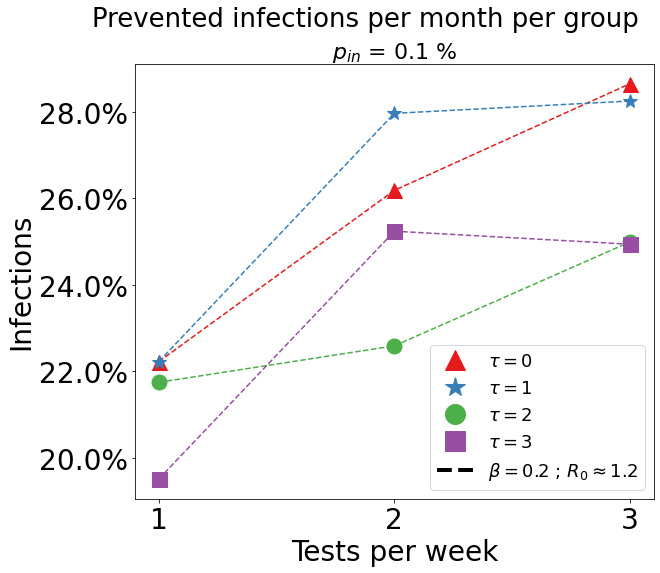

In [178]:
from matplotlib.ticker import PercentFormatter
n_ensemble = 100
n_testing_days=[1, 2, 3]
testing_days=[[2], [1,3], [0,2,4]]
testing_days2=["2", "13", "024"]
betas=[0.18]
p_in_s=[0.0011]
taus=[0, 1, 2, 3]

colors = plt.cm.Set1(range(4))
markers = ['^', '*', 'o', 's']

fig, ax = plt.subplots(figsize = (10,8), gridspec_kw={'left':0.18})
for k, beta in enumerate(betas):
    for j, tau in enumerate(taus):
        for l, p_in in enumerate(p_in_s):
            means = np.array([])
            stds0 = np.array([])
            stds = np.array([])
            for i, n_testing_day in enumerate(n_testing_days):
                data0 = np.loadtxt(Text_files_path+'statistics_days-%d-'%(0)+'0'+'_beta-%.6f_pin-%.6f_tau-%d_%d.txt'%(beta, p_in, tau, times))
                data = np.loadtxt(Text_files_path+'statistics_days-%d-'%(n_testing_day)+testing_days2[i]+'_beta-%.6f_pin-%.6f_tau-%d_%d.txt'%(beta, p_in, tau, times))
                means = np.append(means, ((np.mean(data0[:,0])) - (np.mean(data[:,0])))/(np.mean(data0[:,0])))
                stds0 = np.append(stds0, np.sqrt(np.var(data0[:,0])))
                stds = np.append(stds, np.sqrt(np.var(data[:,0])))
            ax.set_title(r'$p_{in}$ = %.1f %%'%(p_in*100), fontsize = 22)
            ax.plot([1,2,3],means, marker = markers[j], linestyle = '--', color = colors[j], ms = 15)
            #ax.errorbar(x=[1,2,3],y=means, yerr=np.sqrt(stds**2 + stds0**2)/2 , color = colors[j], capsize = 10)
            ax.tick_params(labelsize = 28)
            ax.set_xticks([1,2,3])
            ax.yaxis.set_major_formatter(PercentFormatter(1))
            
            ax.set_xlabel('Tests per week', fontsize = 28)
            ax.set_ylabel('Infections', fontsize = 28)
            #ax.set_ylim(bottom=0)
            
custom_lines = [Line2D([0], [0],linestyle = '', marker = markers[j], ms = 20, color=colors[j], lw=4) for j in range(len(markers))]
labels = [r'$\tau = 0$', r'$\tau = 1$', r'$\tau = 2$', r'$\tau = 3$']
custom_lines2 = [Line2D([0], [0],linestyle = '--', color='k', lw=4)]
labels2 = [r'$\beta = %.1f$ ; $R_0 \approx 1.2$'%(i) for i in betas]
#ax.axis('off')
#ax.axis('off')
ax.legend(custom_lines, labels, fontsize = 22, loc = 0)
#ax.legend(custom_lines2, labels2, fontsize =30, loc = (-.8,0.5))
ax.legend(np.concatenate((custom_lines, custom_lines2)), np.concatenate((labels, labels2)), fontsize = 18, loc = 4)


fig.suptitle('Prevented infections per month per group', fontsize = 26)
#fig.savefig('../../Figures/Kitas_Schools/statistics_prevented_infections_beta-%.2f_estimate.pdf'%(beta))
fig.savefig('../../Figures/Kitas_Schools/statistics_prevented_infections_beta-%.2f_estimate_percent_%d.png'%(beta, times))


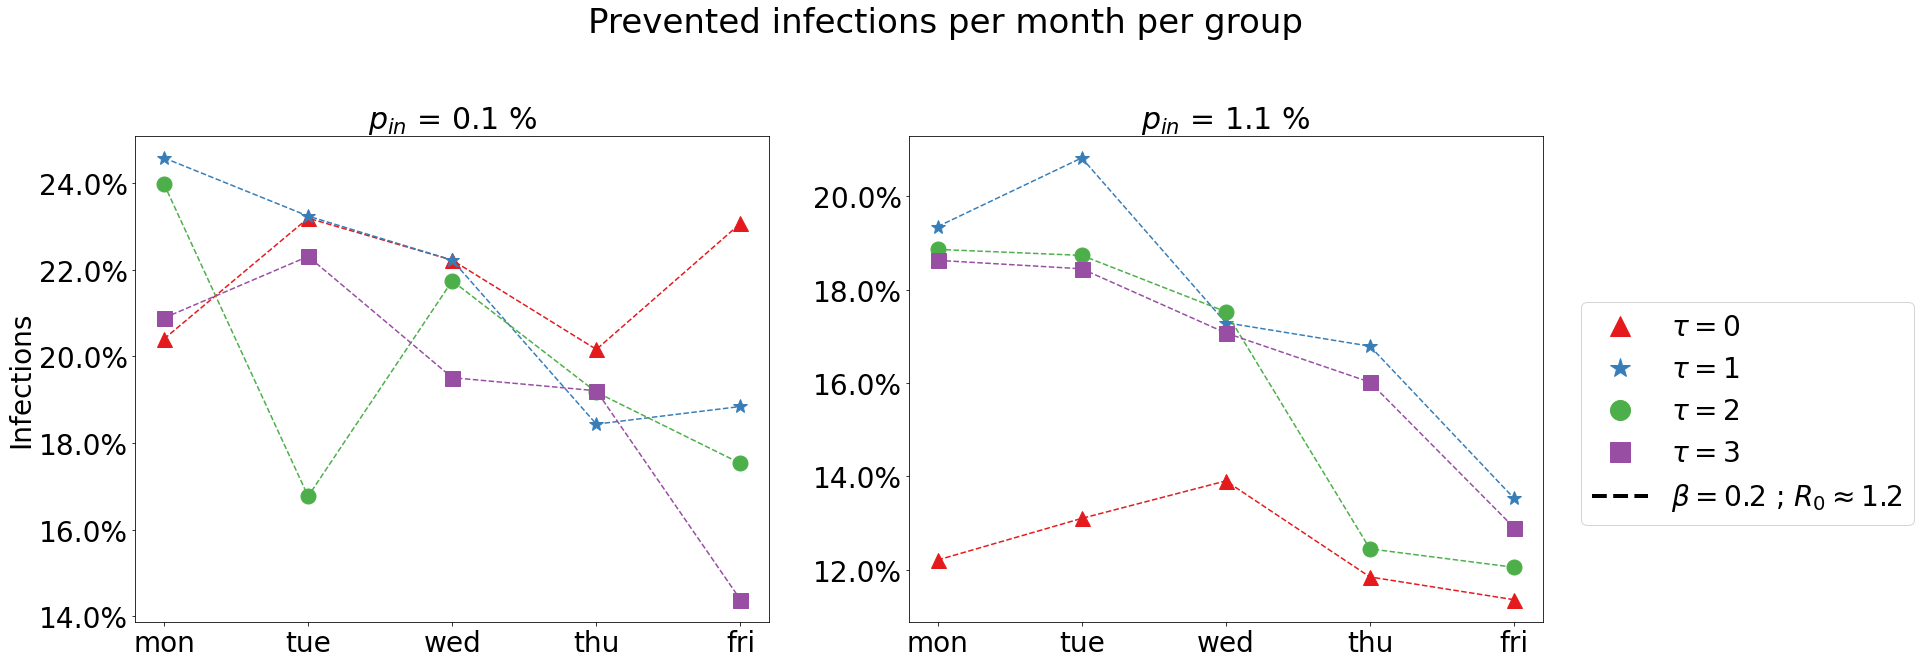

In [179]:
from matplotlib.ticker import PercentFormatter
n_ensemble = 100
n_testing_days=[1]
testing_days=[0, 1, 2, 3, 4]
testing_days2=["0", "1", "2", "3", "4"]
betas=[0.18]
p_in_s=[0.0011, 0.011]
taus=[0, 1, 2, 3]

colors = plt.cm.Set1(range(5))
markers = ['^', '*', 'o', 's']

fig, ax = plt.subplots(1,3,figsize = (30,10), gridspec_kw={'width_ratios': [1, 1, 0.2], 'wspace' : .3, 'top':0.8})
for k, beta in enumerate(betas):
    for j, tau in enumerate(taus):
        for l, p_in in enumerate(p_in_s):
            means = np.array([])
            stds0 = np.array([])
            stds = np.array([])
            for i, testing_day in enumerate(testing_days):
                data0 = np.loadtxt(Text_files_path+'statistics_days-%d-'%(0)+'0'+'_beta-%.6f_pin-%.6f_tau-%d_%d.txt'%(beta, p_in, tau, times))
                data = np.loadtxt(Text_files_path+'statistics_days-%d-'%(1)+testing_days2[i]+'_beta-%.6f_pin-%.6f_tau-%d_%d.txt'%(beta, p_in, tau, times))
                means = np.append(means, ((np.mean(data0[:,0])) - (np.mean(data[:,0])))/(np.mean(data0[:,0])))
                stds0 = np.append(stds0, np.sqrt(np.var(data0[:,0])))
                stds = np.append(stds, np.sqrt(np.var(data[:,0])))
            ax[l].set_title(r'$p_{in}$ = %.1f %%'%(p_in*100), fontsize = 30)
            ax[l].plot([0,1,2,3,4],means, marker = markers[j], linestyle = '--', color = colors[j], ms = 15)
            #ax[l].errorbar(x=[0,1,2,3,4],y=means, yerr=np.sqrt(stds**2 + stds0**2)/2 , color = colors[j], capsize = 10)
            ax[l].tick_params(labelsize = 28)
            ax[l].set_xticks([0, 1, 2, 3, 4])
            ax[l].set_xticklabels(['mon', 'tue', 'wed', 'thu', 'fri'])
            ax[l].yaxis.set_major_formatter(PercentFormatter(1))
            
            if(int(l/2)==1):
                ax[l].set_xlabel('Day', fontsize = 28)
            if(l%2==0):
                ax[l].set_ylabel('Infections', fontsize = 28)
            #ax[l].set_ylim(bottom=0)
            
custom_lines = [Line2D([0], [0],linestyle = '', marker = markers[j], ms = 20, color=colors[j], lw=4) for j in range(len(markers))]
labels = [r'$\tau = 0$', r'$\tau = 1$', r'$\tau = 2$', r'$\tau = 3$']
custom_lines2 = [Line2D([0], [0],linestyle = '--', color='k', lw=4)]
labels2 = [r'$\beta = %.1f$ ; $R_0 \approx 1.2$'%(i) for i in betas]
ax[2].axis('off')
ax[2].axis('off')
ax[2].legend(custom_lines, labels, fontsize = 28, loc = (-.8,0.4))
ax[2].legend(custom_lines2, labels2, fontsize =30, loc = (-.8,0.5))
ax[2].legend(np.concatenate((custom_lines, custom_lines2)), np.concatenate((labels, labels2)), fontsize = 28, loc = (-.8,0.2))


fig.suptitle('Prevented infections per month per group', fontsize = 34)
#fig.savefig('../../Figures/Kitas_Schools/statistics_prevented_infections_one_day_beta-%.2f.pdf'%(beta))
fig.savefig('../../Figures/Kitas_Schools/statistics_prevented_infections_one_day_beta-%.2f_percent_%d.png'%(beta, times))




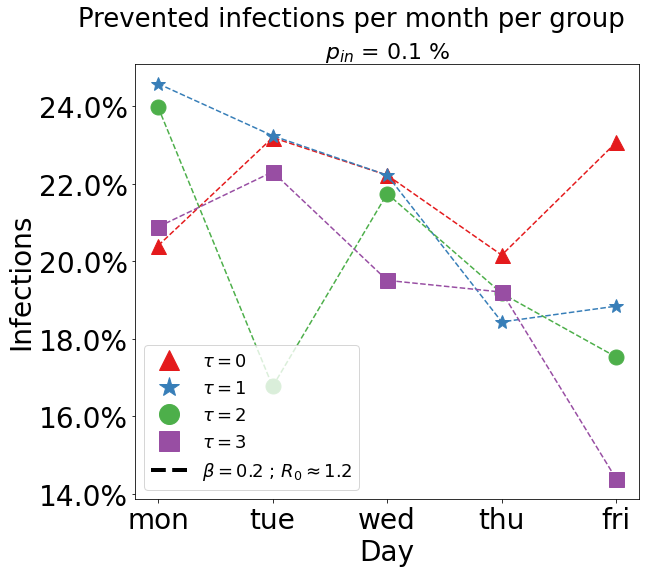

In [180]:
from matplotlib.ticker import PercentFormatter
n_ensemble = 100
n_testing_days=[1]
testing_days=[0, 1, 2, 3, 4]
testing_days2=["0", "1", "2", "3", "4"]
betas=np.array([0.18])
p_in_s=[0.0011]
taus=[0, 1, 2, 3]

colors = plt.cm.Set1(range(4))
markers = ['^', '*', 'o', 's']

fig, ax = plt.subplots(figsize = (10,8), gridspec_kw={'left':0.20})
for k, beta in enumerate(betas):
    for j, tau in enumerate(taus):
        for l, p_in in enumerate(p_in_s):
            means = np.array([])
            stds0 = np.array([])
            stds = np.array([])
            for i, testing_day in enumerate(testing_days):
                data0 = np.loadtxt(Text_files_path+'statistics_days-%d-'%(0)+'0'+'_beta-%.6f_pin-%.6f_tau-%d_%d.txt'%(beta, p_in, tau, times))
                data = np.loadtxt(Text_files_path+'statistics_days-%d-'%(1)+testing_days2[i]+'_beta-%.6f_pin-%.6f_tau-%d_%d.txt'%(beta, p_in, tau, times))
                means = np.append(means, ((np.mean(data0[:,0])) - (np.mean(data[:,0])))/(np.mean(data0[:,0])))
                stds0 = np.append(stds0, np.sqrt(np.var(data0[:,0])))
                stds = np.append(stds, np.sqrt(np.var(data[:,0])))
            ax.set_title(r'$p_{in}$ = %.1f %%'%(p_in*100), fontsize = 22)
            ax.plot([0,1,2,3,4],means, marker = markers[j], linestyle = '--', color = colors[j], ms = 15)
            #ax.errorbar(x=[0,1,2,3,4],y=means, yerr=np.sqrt(stds**2 + stds0**2)/2 , color = colors[j], capsize = 10)
            ax.tick_params(labelsize = 28)
            ax.set_xticks([0, 1, 2, 3, 4])
            ax.set_xticklabels(['mon', 'tue', 'wed', 'thu', 'fri'])
            ax.yaxis.set_major_formatter(PercentFormatter(1))
            
            ax.set_xlabel('Day', fontsize = 28)
            ax.set_ylabel('Infections', fontsize = 28)
            #ax.set_ylim(bottom=0)
            
custom_lines = [Line2D([0], [0],linestyle = '', marker = markers[j], ms = 20, color=colors[j], lw=4) for j in range(len(markers))]
                
labels = [r'$\tau = 0$', r'$\tau = 1$', r'$\tau = 2$', r'$\tau = 3$']
custom_lines2 = [Line2D([0], [0],linestyle = '--', color='k', lw=4)]
labels2 = [r'$\beta = %.1f$ ; $R_0 \approx 1.2$'%(i) for i in betas]
#ax[0,2].axis('off')
#ax[1,2].axis('off')
ax.legend(custom_lines, labels, fontsize = 22, loc = 0)
#ax[1,2].legend(custom_lines2, labels2, fontsize =30, loc = (-.8,0.5))
ax.legend(np.concatenate((custom_lines, custom_lines2)), np.concatenate((labels, labels2)), fontsize = 18, loc = 3)


fig.suptitle('Prevented infections per month per group', fontsize = 26)
#fig.savefig('../../Figures/Kitas_Schools/statistics_prevented_infections_one_day_beta-%.2f_estimate.pdf'%(beta))
fig.savefig('../../Figures/Kitas_Schools/statistics_prevented_infections_one_day_beta-%.2f_estimate_percent_%d.png'%(beta, times))





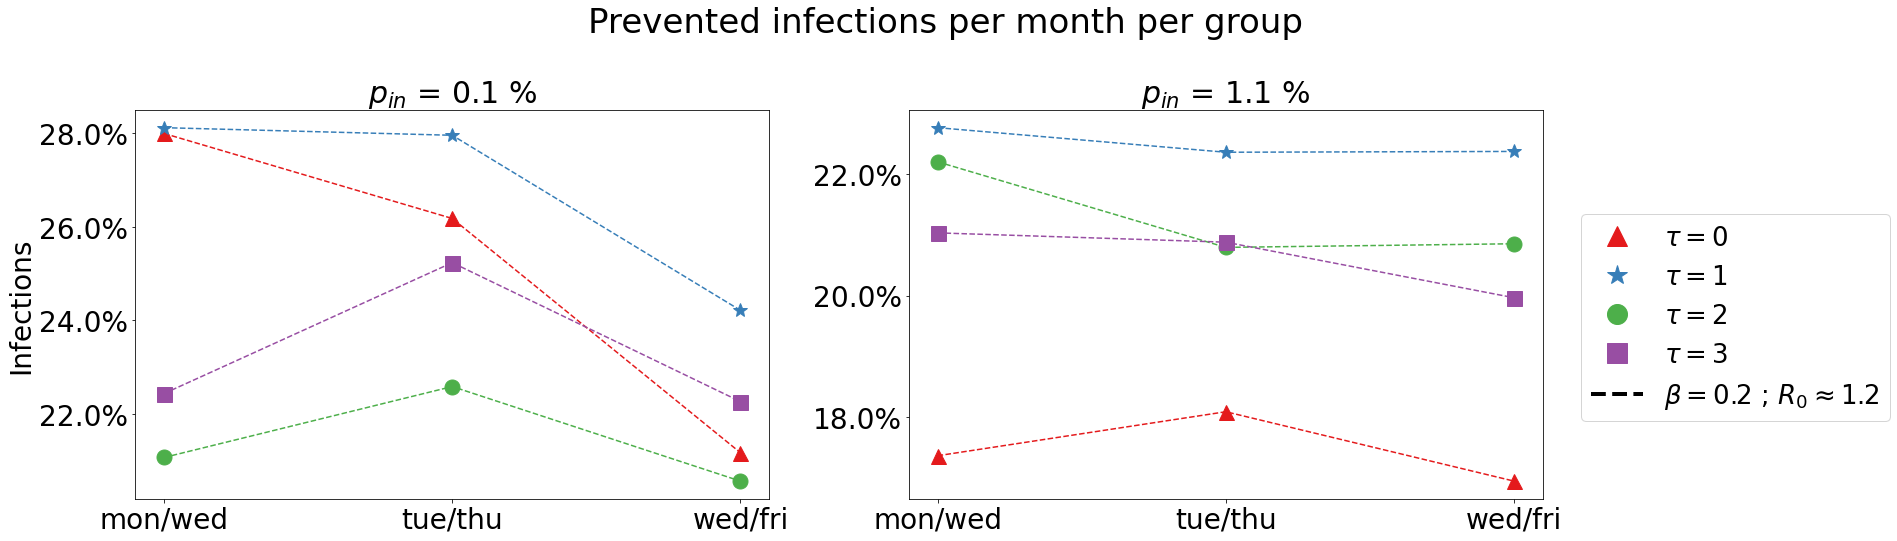

In [181]:
from matplotlib.ticker import PercentFormatter
n_ensemble = 100
n_testing_days=[2]
testing_days=[2, 13, 24]
testing_days2=["02", "13", "24"]
betas=np.array([0.18])
p_in_s=[0.0011, 0.011]
taus=[0, 1, 2, 3]

colors = plt.cm.Set1(range(5))
markers = ['^', '*', 'o', 's']

fig, ax = plt.subplots(1,3,figsize = (30,8), gridspec_kw={'width_ratios': [1, 1, 0.2], 'wspace' : .3, 'top':0.8})
for k, beta in enumerate(betas):
    for j, tau in enumerate(taus):
        for l, p_in in enumerate(p_in_s):
            means = np.array([])
            stds0 = np.array([])
            stds = np.array([])
            for i, testing_day in enumerate(testing_days):
                data0 = np.loadtxt(Text_files_path+'statistics_days-%d-'%(0)+'0'+'_beta-%.6f_pin-%.6f_tau-%d_%d.txt'%(beta, p_in, tau, times))
                data = np.loadtxt(Text_files_path+'statistics_days-%d-'%(2)+testing_days2[i]+'_beta-%.6f_pin-%.6f_tau-%d_%d.txt'%(beta, p_in, tau, times))
                means = np.append(means, ((np.mean(data0[:,0])) - (np.mean(data[:,0])))/(np.mean(data0[:,0])))
                stds0 = np.append(stds0, np.sqrt(np.var(data0[:,0])))
                stds = np.append(stds, np.sqrt(np.var(data[:,0])))
            ax[l].set_title(r'$p_{in}$ = %.1f %%'%(p_in*100), fontsize = 30)
            ax[l].plot([0,1,2],means, marker = markers[j], linestyle = '--', color = colors[j], ms = 15)
            #ax[l].errorbar(x=[0,1,2],y=means, yerr=np.sqrt(stds**2 + stds0**2)/2 , color = colors[j], capsize = 10)
            ax[l].tick_params(labelsize = 28)
            ax[l].set_xticks([0, 1, 2])
            ax[l].set_xticklabels(['mon/wed', 'tue/thu', 'wed/fri'])
            ax[l].yaxis.set_major_formatter(PercentFormatter(1))
            
            if(int(l/2)==1):
                ax[l].set_xlabel('Days', fontsize = 28)
            if(l%2==0):
                ax[l].set_ylabel('Infections', fontsize = 28)
            #ax[l].set_ylim(bottom=0)
            
custom_lines = [Line2D([0], [0],linestyle = '', marker = markers[j], ms = 20, color=colors[j], lw=4) for j in range(len(markers))]
                
labels = [r'$\tau = 0$',r'$\tau = 1$', r'$\tau = 2$', r'$\tau = 3$']
custom_lines2 = [Line2D([0], [0],linestyle = '--', color='k', lw=4)]
labels2 = [r'$\beta = %.1f$ ; $R_0 \approx 1.2$'%(i) for i in betas]
ax[2].axis('off')
ax[2].axis('off')
ax[2].legend(custom_lines, labels, fontsize = 28, loc = (-.8,0.4))
ax[2].legend(custom_lines2, labels2, fontsize =30, loc = (-.8,0.5))
ax[2].legend(np.concatenate((custom_lines, custom_lines2)), np.concatenate((labels, labels2)), fontsize = 26, loc = (-.8,0.2))


fig.suptitle('Prevented infections per month per group', fontsize = 34)
#fig.savefig('../../Figures/Kitas_Schools/statistics_prevented_infections_two_days_beta-%.2f.pdf'%(beta))
fig.savefig('../../Figures/Kitas_Schools/statistics_prevented_infections_two_days_beta-%.2f_percent_%d.png'%(beta, times))



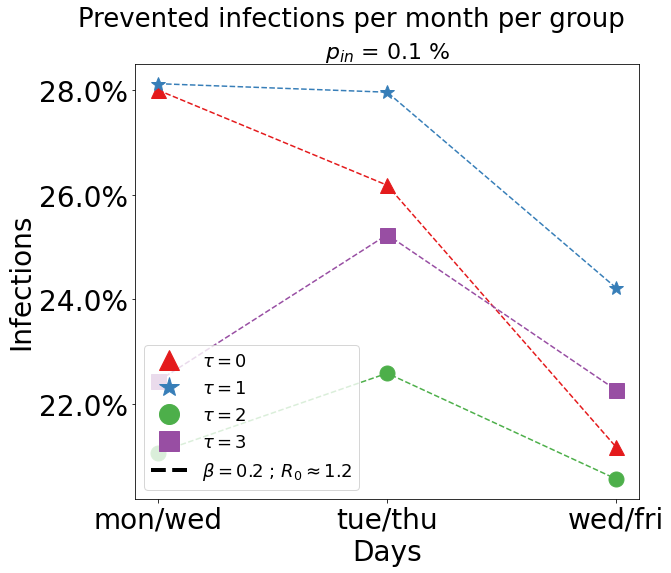

In [182]:
from matplotlib.ticker import PercentFormatter
n_ensemble = 100
n_testing_days=[2]
testing_days=[2, 13, 24]
testing_days2=["02", "13", "24"]
betas=np.array([0.18])
p_in_s=[0.0011]
taus=[0, 1, 2, 3]

colors = plt.cm.Set1(range(5))
markers = ['^', '*', 'o', 's']

fig, ax = plt.subplots(figsize = (10,8), gridspec_kw={'left':0.20})
for k, beta in enumerate(betas):
    for j, tau in enumerate(taus):
        for l, p_in in enumerate(p_in_s):
            means = np.array([])
            stds0 = np.array([])
            stds = np.array([])
            for i, testing_day in enumerate(testing_days):
                data0 = np.loadtxt(Text_files_path+'statistics_days-%d-'%(0)+'0'+'_beta-%.6f_pin-%.6f_tau-%d_%d.txt'%(beta, p_in, tau, times))
                data = np.loadtxt(Text_files_path+'statistics_days-%d-'%(2)+testing_days2[i]+'_beta-%.6f_pin-%.6f_tau-%d_%d.txt'%(beta, p_in, tau, times))
                means = np.append(means, ((np.mean(data0[:,0])) - (np.mean(data[:,0])))/(np.mean(data0[:,0])))
                stds0 = np.append(stds0, np.sqrt(np.var(data0[:,0])))
                stds = np.append(stds, np.sqrt(np.var(data[:,0])))
            ax.set_title(r'$p_{in}$ = %.1f %%'%(p_in*100), fontsize = 22)
            ax.plot([0,1,2],means, marker = markers[j], linestyle = '--', color = colors[j], ms = 15)
            #ax.errorbar(x=[0,1,2],y=means, yerr=np.sqrt(stds**2 + stds0**2)/2 , color = colors[j], capsize = 10)
            ax.tick_params(labelsize = 28)
            ax.set_xticks([0, 1, 2])
            ax.set_xticklabels(['mon/wed', 'tue/thu', 'wed/fri'])
            ax.yaxis.set_major_formatter(PercentFormatter(1))
            
            ax.set_xlabel('Days', fontsize = 28)
            ax.set_ylabel('Infections', fontsize = 28)
            #ax.set_ylim(bottom=0)
            
custom_lines = [Line2D([0], [0],linestyle = '', marker = markers[j], ms = 20, color=colors[j], lw=4) for j in range(len(markers))]
                
labels = [r'$\tau = 0$', r'$\tau = 1$', r'$\tau = 2$', r'$\tau = 3$']
custom_lines2 = [Line2D([0], [0],linestyle = '--', color='k', lw=4)]
labels2 = [r'$\beta = %.1f$ ; $R_0 \approx 1.2$'%(i) for i in betas]
#ax.axis('off')
#ax.axis('off')
ax.legend(custom_lines, labels, fontsize = 22, loc =0)
#ax.legend(custom_lines2, labels2, fontsize =30, loc = (-.8,0.5))
ax.legend(np.concatenate((custom_lines, custom_lines2)), np.concatenate((labels, labels2)), fontsize = 18, loc = 3)


fig.suptitle('Prevented infections per month per group', fontsize = 26)
#fig.savefig('../../Figures/Kitas_Schools/statistics_prevented_infections_two_days_beta-%.2f_estimate.pdf'%(beta))
fig.savefig('../../Figures/Kitas_Schools/statistics_prevented_infections_two_days_beta-%.2f_estimate_percent_%d.png'%(beta, times))


